# HMM-RNN Experiments

This notebook demonstrates how to run experiments using the MANAGER class.

In [1]:
import os
import sys
import torch
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Import our modules
from scripts.manager import Manager

## Run a Single Experiment

Let's run a single experiment with verbose output to see the training progress.

In [1]:
# Initialize the experiment manager with a small HMM configuration
manager = Manager(config_name="HMMTwo_RG")

# Print the configuration
print("Configuration:")
for key, value in manager.config.items():
    print(f"  {key}: {value}")

NameError: name 'Manager' is not defined

In [ ]:
# Run the experiment with verbose output
results = manager.run_experiment(verbose=True)

Starting experiment at 2025-03-04 14:41:38.394265
Configuration saved to Experiments/20250304_144132/HMMTwo_RG/config.pkl and Experiments/20250304_144132/HMMTwo_RG/config.json
Starting RNN training...
Transition Matrix:
[[0.95 0.05]
 [0.05 0.95]]
Using custom emission matrix
Generating HMM data...
Splitting data...
HMM data saved to Experiments/20250304_144132/HMMTwo_RG/data/hmm_sequences.pkl
Training with learning rate: 0.005
Training on device: cuda
Epoch [1/1000], Train Loss: 43.8871, Val Loss: 45.9264
Epoch [10/1000], Train Loss: 35.8426, Val Loss: 35.6926
Epoch [20/1000], Train Loss: 35.5357, Val Loss: 35.5208


KeyboardInterrupt: 

Created directory structure in Experiments/20250304_165943/HMMThree_RGB
Running reverse-engineering analysis...
Model loaded from Experiments/20250304_162931/HMMThree_RGB/models/3HMM_3Outputs_custom_30kData_0.001lr_30.4Loss.pth
Generating RNN sequences for PCA...


/home/elia/Documents/rnnrep/scripts/rnn.py:248: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch.load(path, map_location=self.device))


Running PCA...
Explained variance ratio: [0.9215994  0.04847329 0.01797062 0.00408706 0.0024104 ]
Generating 2D PCA trajectory plot...
2D trajectory plot saved to Experiments/20250304_162931/HMMThree_RGB/figs/latent_trajectory_2d.pdf
Generating 3D PCA trajectory plot...
3D trajectory plot saved to Experiments/20250304_162931/HMMThree_RGB/figs/latent_trajectory_3d.html
GPU memory cleared


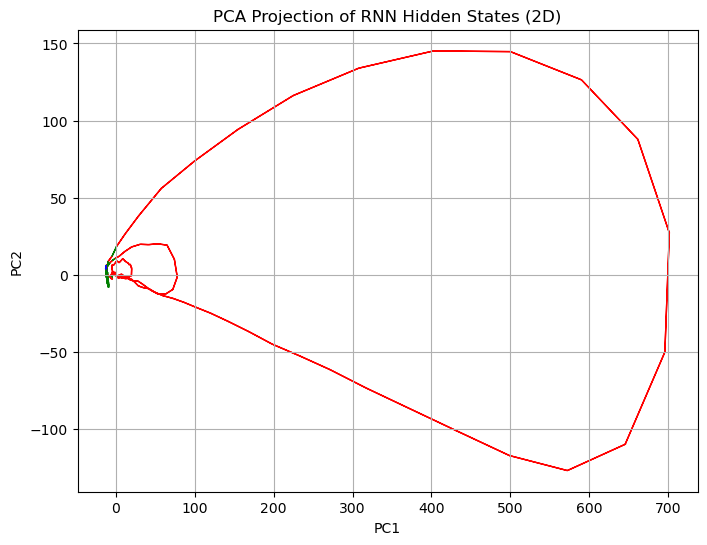

In [ ]:
manager = Manager(config_name="HMMThree_RGB")

# Point to the experiment directory where your model is saved
manager.config_dir = Path("Experiments/20250304_162931/HMMThree_RGB")
manager.models_path = manager.config_dir / "models"
manager.figs_path = manager.config_dir / "figs"
manager.data_path = manager.config_dir / "data"

pca_results = manager.run_reverse()

## Explore the Results

After the experiment completes, we can explore the results directory.

In [ ]:
# Show the experiment directory structure
import os

def print_directory_tree(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * level
        print(f"{indent}{os.path.basename(root)}/")
        sub_indent = ' ' * 4 * (level + 1)
        for f in files:
            print(f"{sub_indent}{f}")

print_directory_tree("Experiments")

## Running Multiple Experiments

You can also run multiple experiments in sequence.

In [ ]:
# Create a new manager
multi_manager = Manager()

# Run multiple experiments
# Only uncommment this if you want to run more lengthy experiments
config_names = ["HMMThree_RGB"]
all_results = multi_manager.run_multiple_experiments(config_names, verbose=True)

## Fixed Point Finder

### From Directory

In [2]:
manager = Manager(config_name="HMMThree_RGB")

# Point to the experiment directory where your model is saved
manager.config_dir = Path("Experiments/20250304_162931/HMMThree_RGB")
manager.models_path = manager.config_dir / "models"
manager.figs_path = manager.config_dir / "figs"
manager.data_path = manager.config_dir / "data"

Created directory structure in Experiments/20250305_113329/HMMThree_RGB


In [ ]:
all_fps, unique_fps = manager.find_fixed_points(num_initial_states=100)
print(f"Found {len(all_fps)} total fixed points, {len(unique_fps)} unique fixed points")

### From .pth Model

In [ ]:
all_fps, unique_fps = manager.find_fixed_points(num_initial_states=100, num_traj=5, plot_unique=True, model_path="path/to/model.pth")
print(f"Found {len(all_fps)} total fixed points, {len(unique_fps)} unique fixed points")